In [128]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [129]:
#loading test image
image = cv2.imread('images/answer_sheet_one.jpg')

## Preprocessing

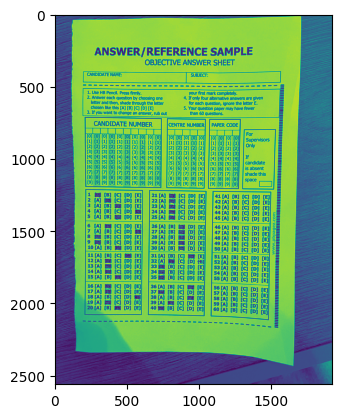

In [130]:
#converting to gray scale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)

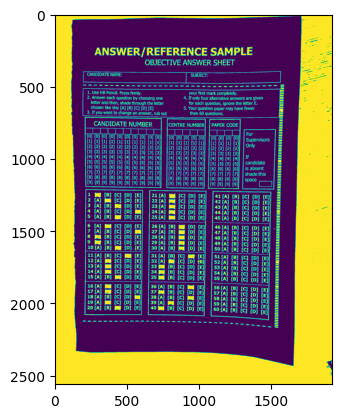

In [131]:
image_noise_reduction = cv2.GaussianBlur(image_gray, (5,5), 1)
_, binary = cv2.threshold(image_noise_reduction, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary)

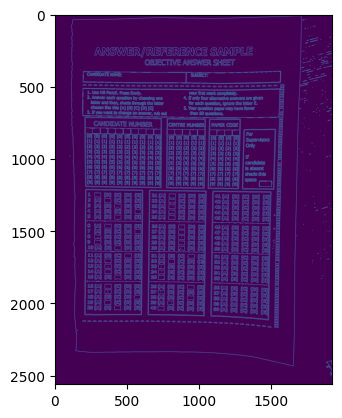

In [132]:
image_edges = cv2.Canny(binary, 10, 50)
plt.imshow(image_edges)

In [133]:
img_contours = image.copy()
contours, hierarchy = cv2.findContours(image_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [134]:
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 1)

array([[[ 36,  64,  81],
        [ 33,  61,  78],
        [ 29,  57,  74],
        ...,
        [ 56,  80, 100],
        [ 53,  77,  97],
        [ 51,  75,  95]],

       [[ 33,  61,  78],
        [ 30,  58,  75],
        [ 27,  55,  72],
        ...,
        [ 58,  82, 102],
        [ 59,  83, 103],
        [ 60,  84, 104]],

       [[ 31,  59,  76],
        [ 29,  57,  74],
        [ 28,  56,  73],
        ...,
        [ 60,  85, 105],
        [ 65,  90, 110],
        [ 68,  93, 113]],

       ...,

       [[  7,  19,  29],
        [  8,  20,  30],
        [  9,  21,  31],
        ...,
        [143, 125,  96],
        [138, 120,  91],
        [138, 120,  91]],

       [[  5,  17,  27],
        [  5,  17,  27],
        [  5,  17,  27],
        ...,
        [146, 128,  99],
        [136, 118,  89],
        [131, 113,  84]],

       [[  9,  21,  31],
        [  7,  19,  29],
        [  6,  18,  28],
        ...,
        [150, 132, 103],
        [128, 110,  81],
        [113,  95,  66]]

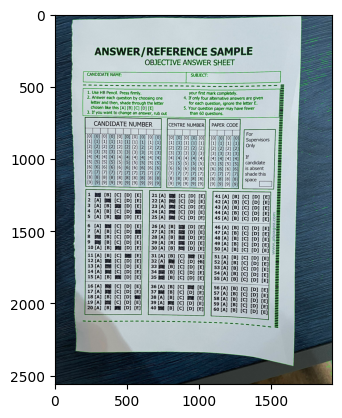

In [135]:
plt.imshow(img_contours)

In [136]:

def rectangle_contour(contours):
    rect_contours = []
    for i in contours:
        area = cv2.contourArea(i)
        if area>100:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i, 0.02*peri, True)
            if len(approx) == 4:
                rect_contours.append(i)

    rect_contours = sorted(rect_contours, key=cv2.contourArea, reverse=True)
    return rect_contours

rectCon = rectangle_contour(contours)


In [137]:
def getCornerPoints(cont):
    peri = cv2.arcLength(cont, True)
    approx = cv2.approxPolyDP(cont, 0.02*peri, True)
    
    return approx

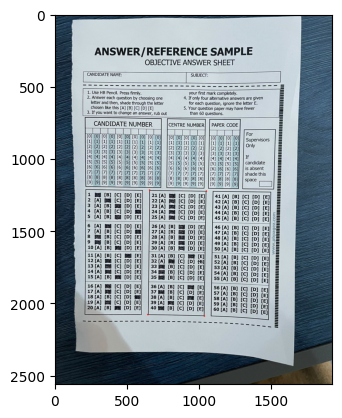

In [140]:
answered_objectives = getCornerPoints(rectCon[2])
img_answered = image.copy()
if answered_objectives.size != 0:
    cv2.drawContours(img_answered, answered_objectives, -1, (255, 0, 0), 10)

plt.imshow(img_answered)